In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 3.0 MB/s eta 0:00:24
    --------------------------------------- 1.0/72.0 MB 2.7 MB/s eta 0:00:26
    --------------------------------------- 1.6/72.0 MB 2.7 MB/s eta 0:00:27
   - -------------------------------------- 2.1/72.0 MB 2.8 MB/s eta 0:00:25
   - -------------------------------------- 2.6/72.0 MB 2.8 MB/s eta 0:00:26
   - -------------------------------------- 3.1/72.0 MB 2.6 MB/s eta 0:00:26
   - -------------------------------------- 3.4/72.0 MB 2.7 MB/s eta 0:00:26
   -- ------------------------------------- 4.2/72.0 MB 2.7 MB/s eta 0:00:26
   -- ------------------------------------- 4.7/72.0 MB 2.6 MB/s eta 0:00:26
   -- ------------------------------------- 5.2/72.0 MB 2.7 MB/s eta 0:00:25
   --- ------------------------------------ 6.0/72.0 MB 2.7 MB/s eta 0:00:25
   --- ------

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [6]:
calories_df = pd.read_csv('../Dataset/calories.csv')
exercise_df = pd.read_csv('../Dataset/exercise.csv')

In [7]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
df = pd.concat([exercise_df, calories_df['Calories']], axis = 1)

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df.shape

(15000, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Analysis

In [12]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [13]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

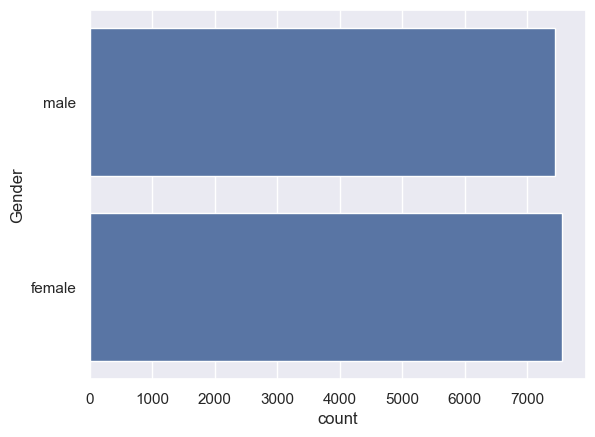

In [16]:
sns.countplot(df.Gender)

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

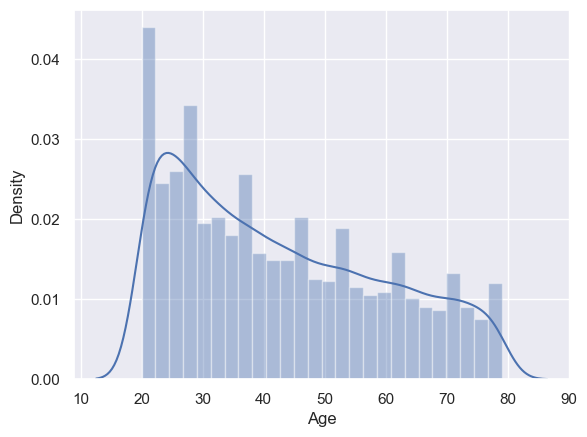

In [19]:
sns.distplot(df.Age)

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\2141771958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Height)


<Axes: xlabel='Height', ylabel='Density'>

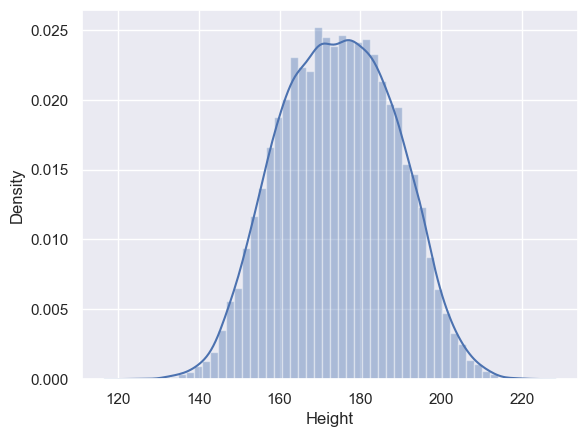

In [20]:
sns.distplot(df.Height)

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\1713582394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Weight)


<Axes: xlabel='Weight', ylabel='Density'>

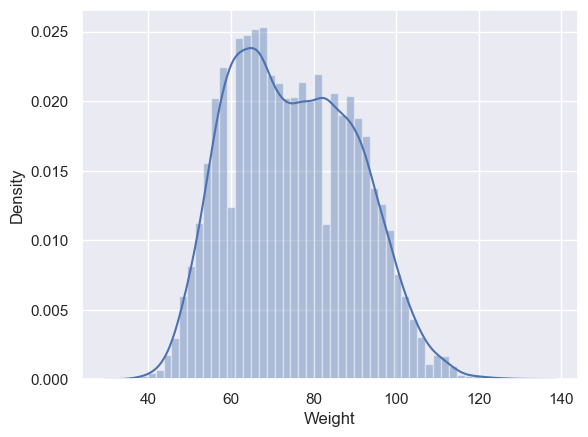

In [22]:
sns.distplot(df.Weight)

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\2827524127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Duration)


<Axes: xlabel='Duration', ylabel='Density'>

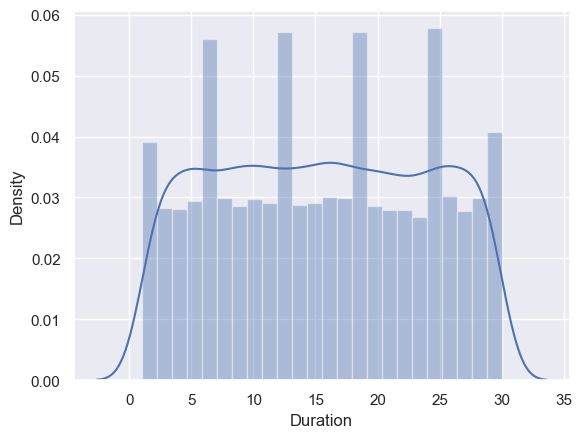

In [23]:
sns.distplot(df.Duration)

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\1849062316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Heart_Rate)


<Axes: xlabel='Heart_Rate', ylabel='Density'>

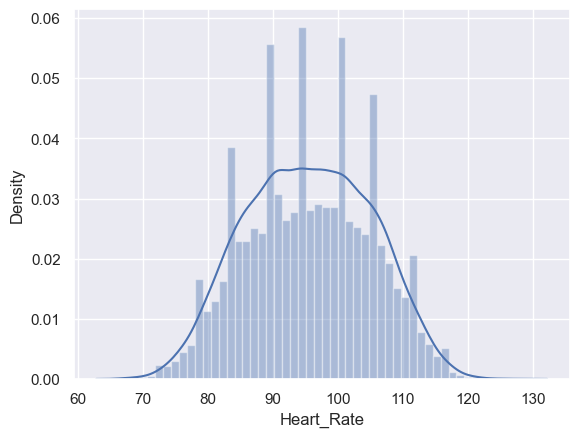

In [25]:
sns.distplot(df.Heart_Rate)

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\2942115313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Body_Temp)


<Axes: xlabel='Body_Temp', ylabel='Density'>

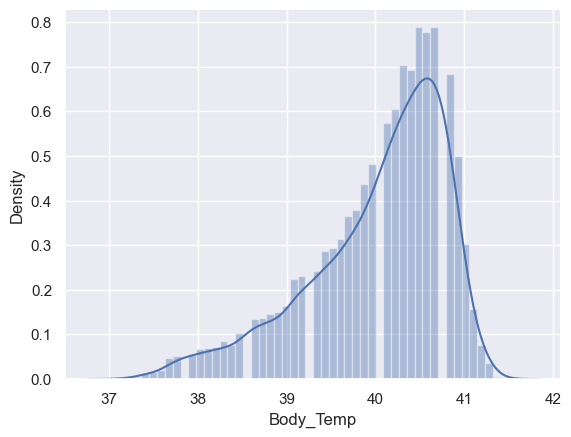

In [26]:
sns.distplot(df.Body_Temp)

In [29]:
correlation = df.select_dtypes(include=['number']).corr()

<Axes: >

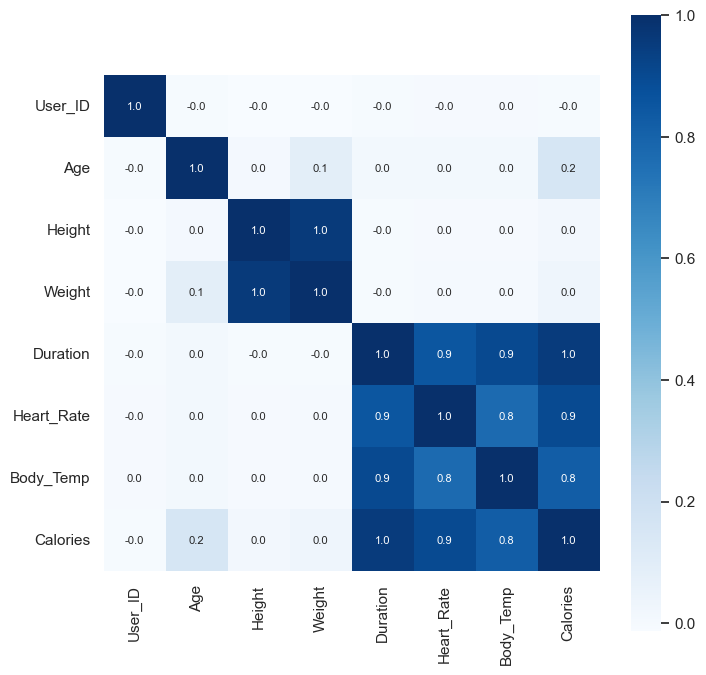

In [37]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

Text To Numerical

In [48]:
df1 = df.replace({'Gender': {'male': 0, 'female': 1}})
df1.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\2841190282.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df.replace({'Gender': {'male': 0, 'female': 1}})


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [50]:
X = df1.drop(columns = ['User_ID', 'Calories'], axis = 1)
y = df1.Calories

In [51]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [52]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [54]:
X.shape, X_train.shape, X_test.shape

((15000, 7), (12000, 7), (3000, 7))

Model Training

In [55]:
model = XGBRegressor() 

In [57]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Model Evaluation

In [58]:
test_data_prediction = model.predict(X_test)

In [62]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [64]:
print('Mean absolute error : ' , mae)

Mean absolute error :  1.4833678883314132


In [65]:
import pickle

In [66]:
with open('../Model/calories_burnt_model.pkl', 'wb') as file:
    pickle.dump(model, file)